In [ ]:
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense,MaxPool2D
from keras import backend as K
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import Adam
import keras
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Conv2D, MaxPooling2D
#from keras.optimizers import Adam
#!pip install -U git+https://github.com/qubvel/efficientnet
#import efficientnet.keras as enet
from keras.utils.np_utils import to_categorical
import pandas as pd
from tensorflow.keras.layers import Input


In [ ]:
#!pip install h5py==2.10.0

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.preprocessing.image import load_img
import glob
data=[]
labels=[]
bkl = glob.glob('/content/gdrive/MyDrive/3class_dataset/train/bkl/*.jpg')
mel= glob.glob('/content/gdrive/MyDrive/3class_dataset/train/mel/*.jpg')
nv = glob.glob('/content/gdrive/MyDrive/3class_dataset/train/nv/*.jpg')




In [ ]:
for i in bkl:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(0)

for i in mel:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(1)
  
for i in nv:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(2)



In [ ]:


bkl1 = glob.glob('/content/gdrive/MyDrive/3class_dataset/test/bkl/*.jpg')
mel1= glob.glob('/content/gdrive/MyDrive/3class_dataset/test/mel/*.jpg')
nv1 = glob.glob('/content/gdrive/MyDrive/3class_dataset/test/nv/*.jpg')

for i in bkl1:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(0)

In [ ]:
for i in mel1:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(1)
for i in nv1:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(2)

In [ ]:
df=pd.DataFrame({'data':data,'labels':labels})
df2 = df.sample(frac = 1)
data1=np.asarray(df2.iloc[:,0].tolist())
labels1=np.asarray(df2.iloc[:,1].tolist())

In [ ]:
from keras.utils.np_utils import to_categorical
#y_test=data1
cat_labels = to_categorical(labels1, num_classes=3)
data1=data1/255
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data1, cat_labels, test_size=0.25, random_state=250)
x_train.shape


(3375, 224, 224, 3)

In [ ]:
y_test.shape

(1125, 3)

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
dataAugmentaion = ImageDataGenerator(rotation_range = 30, zoom_range = 0.20, 
fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
width_shift_range = 0.1, height_shift_range = 0.1)



In [ ]:
base_model =tf.keras.applications.MobileNet(input_shape=(224,224,3),weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(3, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# training the model
model.fit_generator(dataAugmentaion.flow(x_train, y_train, batch_size = 32),
 validation_data = (x_test,y_test), steps_per_epoch = len(x_train) // 32,
 epochs = 10)

In [ ]:
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.layers import Input

# # this could also be the output a different Keras model or layer
# input_tensor = Input(shape=(224, 224, 3))

# model = InceptionV3(input_tensor=input_tensor, weights=None, include_top=True,classes=3,classifier_activation='softmax')

In [ ]:
batch_size = 15
epochs =70

hist = model.fit(
    x_train,y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test,y_test),
    verbose=2)

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

<Figure size 432x432 with 0 Axes>

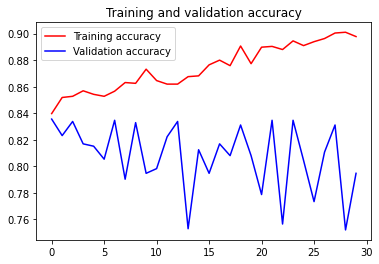

<Figure size 432x432 with 0 Axes>

In [ ]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure(figsize=(6,6))

<Figure size 432x432 with 0 Axes>

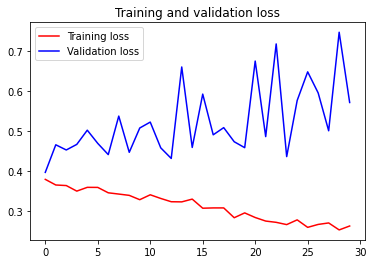

<Figure size 432x432 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure(figsize=(6,6))